In [8]:
!pip install nltk


In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
!pip install nltk wordcloud


In [11]:
import numpy as np
import pandas as pd
import nltk
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation 
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from wordcloud import WordCloud


from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords



In [12]:
file_path = '/kaggle/input/amazon-customer-reviews-csv/Amazon Customer Reviews.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [13]:
df.shape

(568454, 10)

In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.duplicated(['UserId', 'ProfileName', 'Time', 'Text']).sum()

174487

In [18]:
df = df.drop_duplicates(subset=['UserId', 'ProfileName', 'Time', 'Text'])


In [19]:
df.shape

(393914, 10)

In [20]:
review_count= df.Score.value_counts()
review_count

Score
5    250951
4     56093
1     36303
3     29767
2     20800
Name: count, dtype: int64

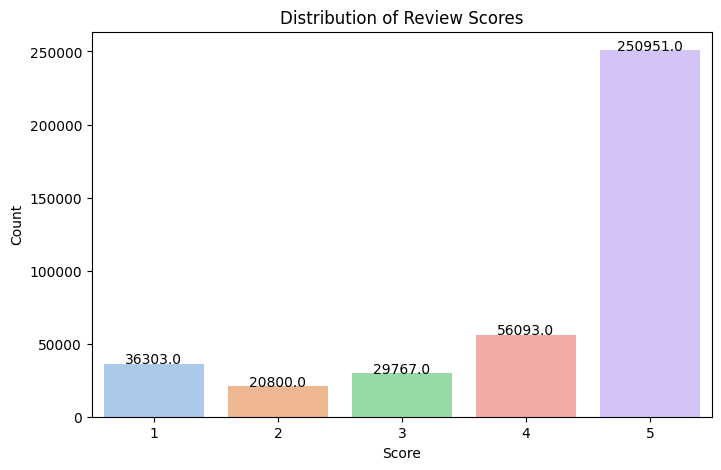

In [21]:
plt.figure(figsize=(8, 5))
sns.set_palette("pastel")
ax = sns.countplot(x='Score', data=df)
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')



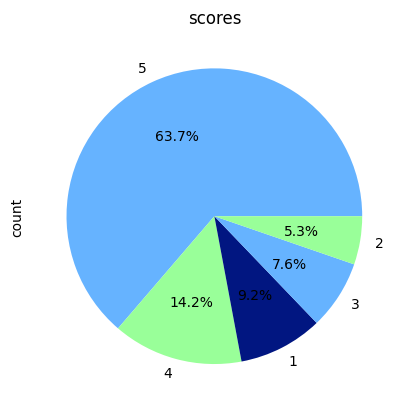

In [22]:
class_distribution = df['Score'].value_counts()
class_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#011681',])
plt.title('scores')
plt.show()

In [23]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['Text'].apply(remove_unnecessary_characters)

In [24]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide ...
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Great for sesame chickenthis is a good if not ...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Im disappointed with the flavor The chocolate ...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",These stars are small so you can give 1015 of ...
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,These are the BEST treats for training and rew...


In [25]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['clean_text'].apply(normalize_text)

In [26]:

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
    

In [52]:
import nltk

# تحديد المسار المخصص
nltk.data.path.append('/kaggle/working/nltk_data')

# تنزيل الموارد المطلوبة
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')
nltk.download('omw-1.4', download_dir='/kaggle/working/nltk_data')  # دعم إضافي


[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
import os
print(os.listdir('/kaggle/working/nltk_data/corpora'))


['omw-1.4.zip', 'stopwords', 'stopwords.zip', 'wordnet.zip']


In [55]:
import zipfile
import os

zip_path = '/kaggle/working/nltk_data/corpora/wordnet.zip'
extract_path = '/kaggle/working/nltk_data/corpora/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("DONE")


DONE


In [57]:
def lem(text):
    sentence = []
    for word in text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)
df['final_text']=df['normalized_text'].apply(lem)


In [59]:

def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['normalized_text'].apply(tokenize_text)

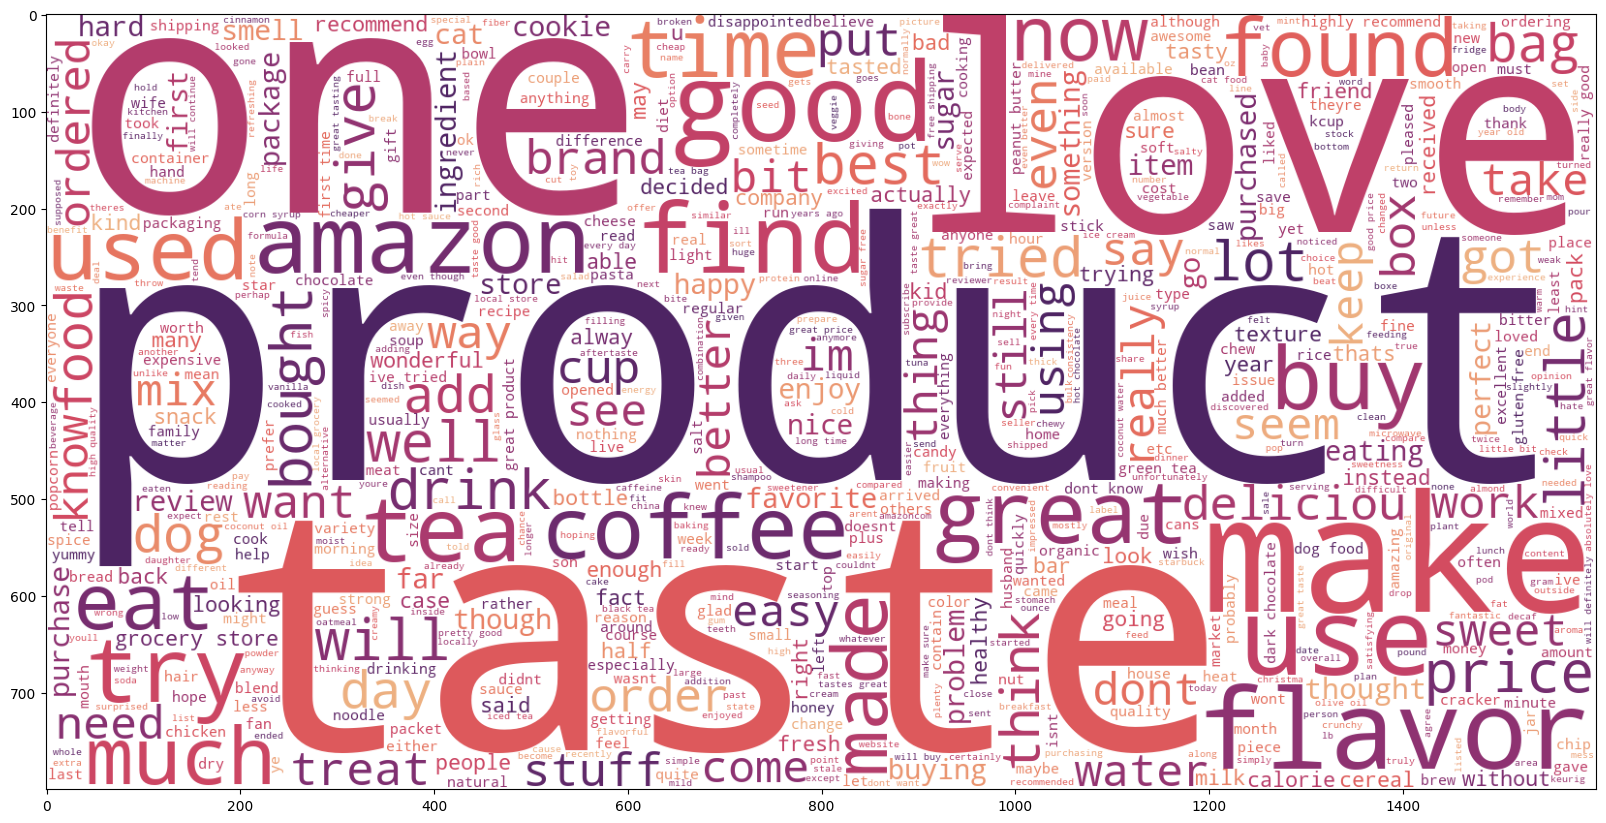

In [60]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=1600,background_color="white", colormap='flare').generate(' '.join(df['normalized_text']))

plt.imshow(wc)

In [103]:
df=df[['normalized_text','Score']]
df.head()

,normalized_text,Score
0,i have bought several of the vitality canned d...,5
1,product arrived labeled as jumbo salted peanut...,1
2,this is a confection that has been around a fe...,4
3,if you are looking for the secret ingredient i...,2
4,great taffy at a great price there was a wide ...,5


In [104]:
df.head()

,normalized_text,Score
0,i have bought several of the vitality canned d...,5
1,product arrived labeled as jumbo salted peanut...,1
2,this is a confection that has been around a fe...,4
3,if you are looking for the secret ingredient i...,2
4,great taffy at a great price there was a wide ...,5


In [105]:
from textblob import TextBlob

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['normalized_text'].apply(getSubjectivity)
df['Polarity'] = df['normalized_text'].apply(getPolarity)
def polarity_to_label(polarity):
    if polarity > 0:
        return 3  # Positive
    elif polarity < 0:
        return 1  # Negative
    else:
        return 2  # Neutral


df['label'] = df['Polarity'].apply(polarity_to_label)

df

,normalized_text,Score,Subjectivity,Polarity,label
0,i have bought several of the vitality canned d...,5,0.433333,0.450000,3
1,product arrived labeled as jumbo salted peanut...,1,0.762963,-0.033333,1
2,this is a confection that has been around a fe...,4,0.448571,0.133571,3
3,if you are looking for the secret ingredient i...,2,0.533333,0.166667,3
4,great taffy at a great price there was a wide ...,5,0.637500,0.483333,3
...,...,...,...,...,...
568449,great for sesame chickenthis is a good if not ...,5,0.605000,0.365000,3
568450,im disappointed with the flavor the chocolate ...,2,0.492857,-0.250000,1
568451,these stars are small so you can give 1015 of ...,5,0.418750,-0.021875,1
568452,these are the best treats for training and rew...,5,0.678571,0.521429,3


In [107]:
df['label'].value_counts()

label
3    347196
1     40805
2      5913
Name: count, dtype: int64

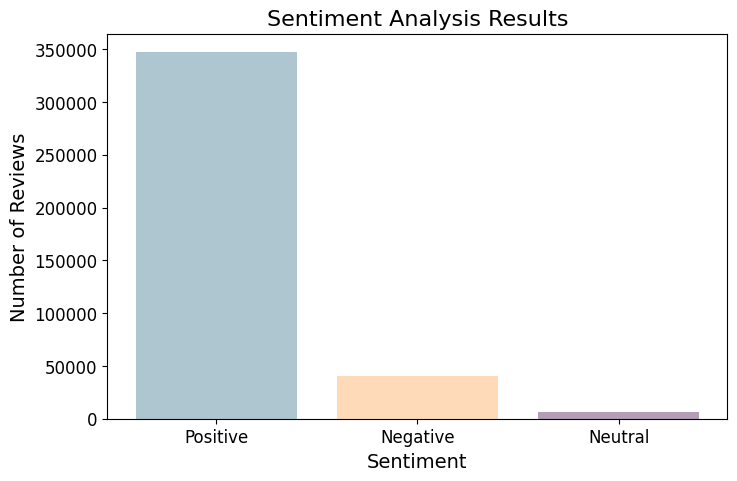

In [64]:
import matplotlib.pyplot as plt
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [347196, 40805, 5913]
plt.figure(figsize=(8, 5))  
plt.bar(sentiments, counts, color=['#AEC6CF', '#FFDAB9', '#B39EB5'])
plt.title('Sentiment Analysis Results', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [108]:
def score_to_label(score):
    if score <= 2:
        return 1  # Negative
    elif score == 3:
        return 2  # Neutral
    else:
        return 3  # Positive

df['Score_Label'] = df['Score'].apply(score_to_label)
df.head()

,normalized_text,Score,Subjectivity,Polarity,label,Score_Label
0,i have bought several of the vitality canned d...,5,0.433333,0.450000,3,3
1,product arrived labeled as jumbo salted peanut...,1,0.762963,-0.033333,1,1
2,this is a confection that has been around a fe...,4,0.448571,0.133571,3,3
3,if you are looking for the secret ingredient i...,2,0.533333,0.166667,3,1
4,great taffy at a great price there was a wide ...,5,0.637500,0.483333,3,3


In [109]:
def compare_labels(row):
    if row['label'] == row['Score_Label']:
        return 'Matched'
    else:
        return 'Mismatch'

df['Comparison'] = df.apply(compare_labels, axis=1)


In [110]:
df.head()

,normalized_text,Score,Subjectivity,Polarity,label,Score_Label,Comparison
0,i have bought several of the vitality canned d...,5,0.433333,0.450000,3,3,Matched
1,product arrived labeled as jumbo salted peanut...,1,0.762963,-0.033333,1,1,Matched
2,this is a confection that has been around a fe...,4,0.448571,0.133571,3,3,Matched
3,if you are looking for the secret ingredient i...,2,0.533333,0.166667,3,1,Mismatch
4,great taffy at a great price there was a wide ...,5,0.637500,0.483333,3,3,Matched


In [111]:
comparison_counts = df['Comparison'].value_counts()

print(comparison_counts)

Comparison
Matched     310556
Mismatch     83358
Name: count, dtype: int64


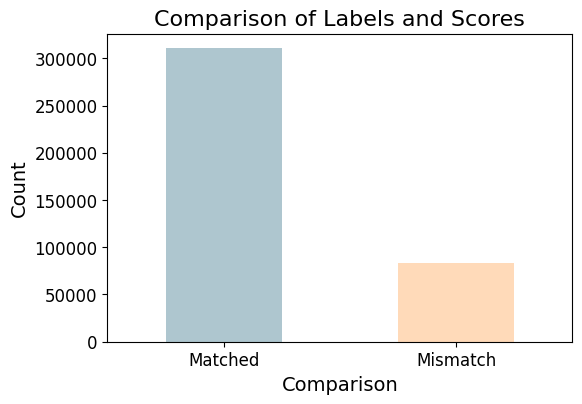

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  
comparison_counts.plot(kind='bar', color=['#AEC6CF', '#FFDAB9'])  

plt.title('Comparison of Labels and Scores', fontsize=16)
plt.xlabel('Comparison', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["normalized_text"],
                                                    df["Analysis"],test_size=0.20,
                                                    random_state=42)

In [ ]:
tf_idf_word_vectorizer = TfidfVectorizer().fit(x_train)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(x_train)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error , accuracy_score , classification_report, confusion_matrix
rf = RandomForestClassifier().fit(x_train_tf_idf_word,y_train)
y_pred_rf = rf.predict(x_test_tf_idf_word )
print(classification_report(y_pred_rf, y_test))